In [1]:
# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [3]:
# Import data & sort

In [4]:
df = pd.read_excel('data/newData.xlsx')
df_sorted = df.sort_values(by='temperature', ascending=True)
df_sorted.to_excel('sorted_data.xlsx', index=False)

In [5]:
# Plot sorted data just for show

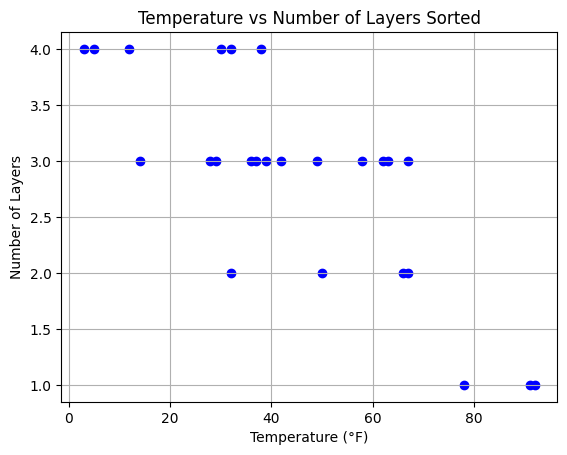

In [6]:
plt.scatter(df_sorted['temperature'], df_sorted['layer_count'], marker='o', color='b')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Layers')
plt.title('Temperature vs Number of Layers Sorted')
plt.grid(True)
plt.show()

In [7]:
# Make model

In [8]:
reg = linear_model.LinearRegression()
reg.fit(df_sorted['temperature'].values.reshape(-1,1), df_sorted['layer_count'].values)
print("Coeficient(s):", reg.coef_)
print("Intercept:", reg.intercept_)

Coeficient(s): [-0.03039012]
Intercept: 4.201477162293489


In [9]:
# Simple prediction

In [10]:
curr_temp = 44
prediction = reg.predict([[curr_temp]])
print(f"You should wear {prediction} layers if its {curr_temp} °F outside" )

You should wear [2.86431209] layers if its 44 °F outside


In [11]:
# Make general y prediction

In [12]:
x_values = np.linspace(df_sorted['temperature'].min(), df_sorted['temperature'].max(), 20).reshape(-1,1)
y_pred = reg.predict(x_values)

In [13]:
# Display general y prediction

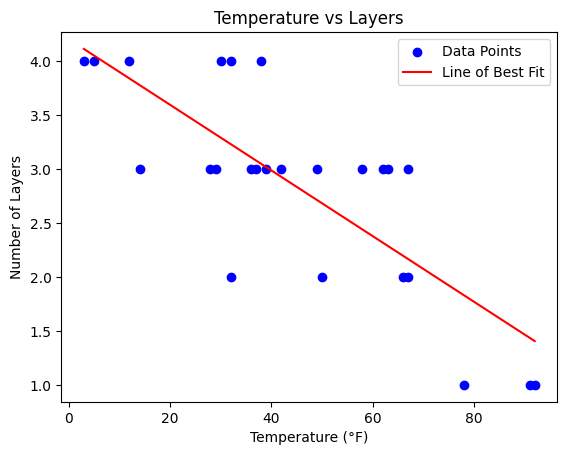

In [14]:
plt.scatter(df_sorted['temperature'], df_sorted['layer_count'], color='blue', label='Data Points')
plt.plot(x_values, y_pred, color='red', label='Line of Best Fit')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Layers')
plt.legend()
plt.title('Temperature vs Layers')
plt.show()